In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from IPython.display import display, Markdown

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Import dataset and utilities
from dataset_utils import ECFPDataset
from downstream import run_downstream_task
from transforms import (
    Rotation, Permutation, Scaling, Translation, Shear, Reflection
)
from pairwise_distances import (
    analyze_distance_preservation,
    compare_sparsity,
    compute_sparsity_metrics
)
from plots import plot_value_distributions

from run_experiment import run_experiment

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✓ Setup complete!')

# Store all results globally
all_results = {}

c:\Users\alber\venvs\ecfp_transformation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Setup complete!


### Binary ECFP Baseline

In [2]:
print('='*70)
print('BINARY ECFP BASELINES')
print('='*70)

datasets = ['esol', 'lipo', 'bace']

for dataset in datasets:
    experiment_name = f'{dataset}_Binary_Baseline'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=None,
        analyze_distances=False
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BINARY ECFP BASELINES

[esol_Binary_Baseline] ESOL - Binary ECFP
  RMSE: Val=1.1067, Test=1.1008

[lipo_Binary_Baseline] LIPO - Binary ECFP
  RMSE: Val=0.8105, Test=0.8257

[bace_Binary_Baseline] BACE - Binary ECFP
  ROC-AUC: Val=0.9073, Test=0.8672


### Count ECFP Baseline

In [3]:
print('='*70)
print('COUNT ECFP BASELINES')
print('='*70)

for dataset in datasets:
    experiment_name = f'{dataset}_Count_Baseline'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=None,
        analyze_distances=False
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }


COUNT ECFP BASELINES

[esol_Count_Baseline] ESOL - Count ECFP
  RMSE: Val=0.6703, Test=0.7606

[lipo_Count_Baseline] LIPO - Count ECFP
  RMSE: Val=0.7517, Test=0.7302

[bace_Count_Baseline] BACE - Count ECFP
  ROC-AUC: Val=0.9080, Test=0.8545


### Affine transformations

In [4]:
def generate_random_rotation(dim, seed=42):
    g = torch.Generator().manual_seed(seed)
    A = torch.randn(dim, dim, generator=g)
    Q, R = torch.linalg.qr(A)
    d = torch.sign(torch.diagonal(R))
    Q = Q * d
    return Q

dim = 2048

# Affine transformations
Q_rotation = generate_random_rotation(dim, seed=42)
rotation_transform = Rotation(Q_rotation)

perm = torch.randperm(dim, generator=torch.Generator().manual_seed(42))
permutation_transform = Permutation(perm)

translation_vec = torch.randn(dim, generator=torch.Generator().manual_seed(44)) * 0.1
translation_transform = Translation(translation_vec)

shear_matrix = torch.eye(dim)
for i in range(min(10, dim-1)):
    shear_matrix[i, i+1] = 0.2
shear_transform = Shear(shear_matrix)

reflection_matrix = -torch.eye(dim)
reflection_transform = Reflection(reflection_matrix)

scales = torch.rand(dim, generator=torch.Generator().manual_seed(42)) * 1.5 + 0.5
scaling_transform = Scaling(scales)


print('✓ Transformation objects generated!')

✓ Transformation objects generated!


#### Rotation

In [5]:
print('='*70)
print('ROTATION')
print('='*70)


for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Rotation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=rotation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Rotation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=rotation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }


ROTATION

[esol_Binary_Rotation] ESOL - Binary ECFP
  RMSE: Val=1.1246, Test=1.0797
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: -0.1517 (p=5.49e-229)
  -> Poor preservation

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 0.9999 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine distances on 

#### Translation

In [6]:
print('='*70)
print('TRANSLATION')
print('='*70)

for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Translation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=translation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Translation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=translation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

TRANSLATION

[esol_Binary_Translation] ESOL - Binary ECFP
  RMSE: Val=1.2450, Test=1.1819
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 0.2686 (p=0.00e+00)
  -> Poor preservation

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: 0.9122 (p=0.00e+00)
  -> Excellent preservation!

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 0.9998 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine distances

#### Scaling

In [7]:
print('='*70)
print('SCALING')
print('='*70)

for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Scaling'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=scaling_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Scaling'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=scaling_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

SCALING

[esol_Binary_Scaling] ESOL - Binary ECFP
  RMSE: Val=1.0539, Test=1.0957
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 0.9470 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: 0.9797 (p=0.00e+00)
  -> Excellent preservation!

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 0.9732 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine distances o

#### Permutation

In [8]:
print('='*70)
print('PERMUTATION')
print('='*70)

for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Permutation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=permutation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Permutation'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=permutation_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

PERMUTATION

[esol_Binary_Permutation] ESOL - Binary ECFP
  RMSE: Val=1.1612, Test=1.1158
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine dis

#### Reflection

In [9]:
print('='*70)
print('REFLECTION')
print('='*70)

for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Reflection'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=reflection_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Reflection'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=reflection_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

REFLECTION

[esol_Binary_Reflection] ESOL - Binary ECFP
  RMSE: Val=1.1467, Test=1.0817
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: -0.0864 (p=4.13e-75)
  -> Poor preservation

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine distances 

#### Shear

In [10]:
print('='*70)
print('SHEAR')
print('='*70)

for dataset in datasets:
    # Binary ECFP
    experiment_name=f'{dataset}_Binary_Shear'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=shear_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count ECFP
    experiment_name=f'{dataset}_Count_Shear'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=shear_transform
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

SHEAR

[esol_Binary_Shear] ESOL - Binary ECFP
  RMSE: Val=1.1644, Test=1.1305
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 1.0000 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: 0.9998 (p=0.00e+00)
  -> Excellent preservation!

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 0.9998 (p=0.00e+00)
  -> Excellent preservation!

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
  Computing cosine distances on tr

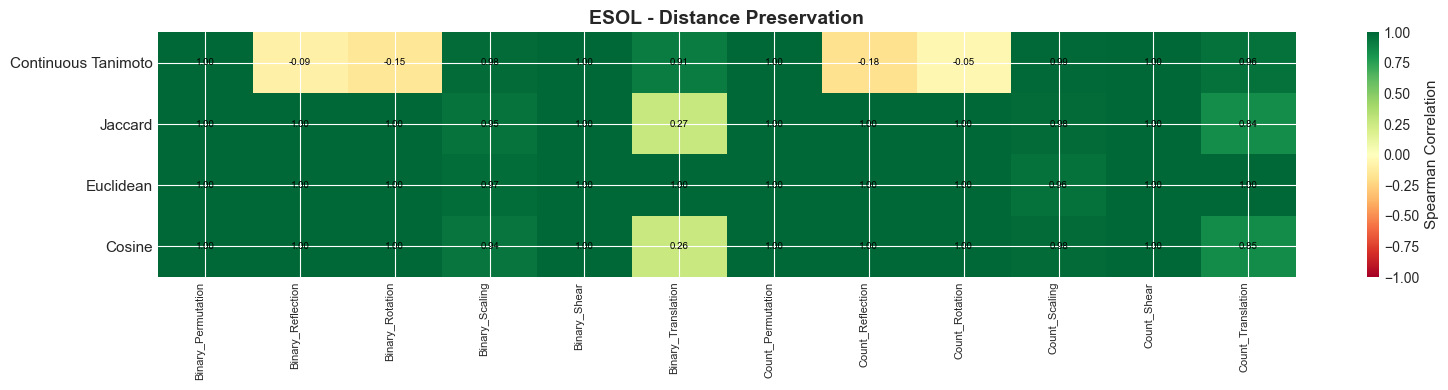


ESOL - Best Distance Preservation:
  Experiment: Count_Permutation
  Average: 1.0000
  Tanimoto: 1.0000
  Euclidean: 1.0000
  Cosine: 1.0000



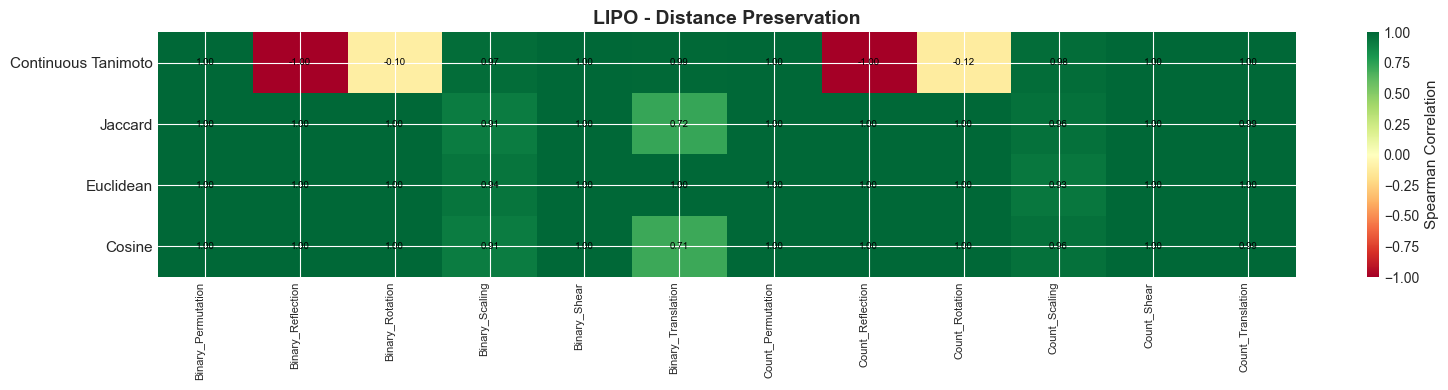


LIPO - Best Distance Preservation:
  Experiment: Count_Permutation
  Average: 1.0000
  Tanimoto: 1.0000
  Euclidean: 1.0000
  Cosine: 1.0000



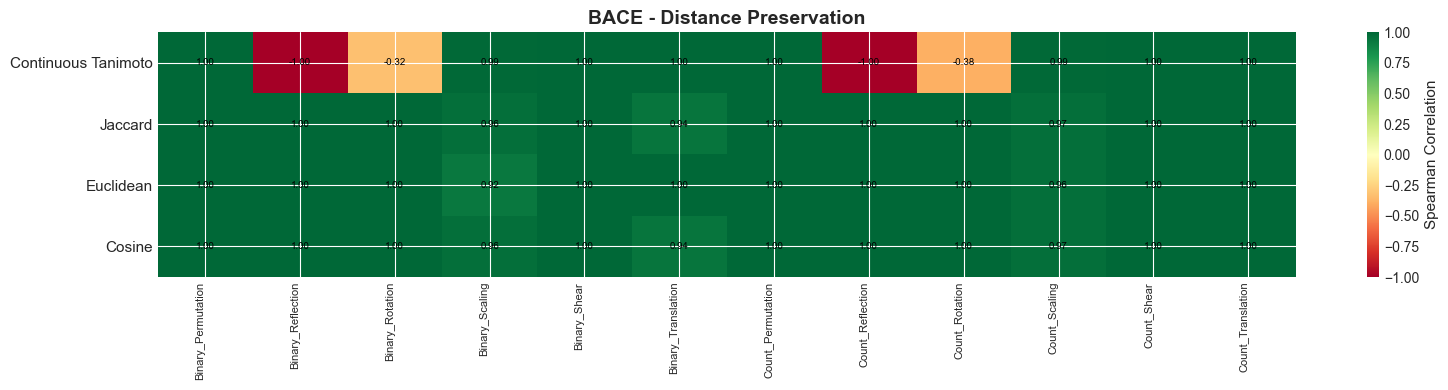


BACE - Best Distance Preservation:
  Experiment: Count_Permutation
  Average: 1.0000
  Tanimoto: 1.0000
  Euclidean: 1.0000
  Cosine: 1.0000



In [11]:
for dataset_name in ['esol', 'lipo', 'bace']:
    # Filter results with distance metrics
    dataset_results = {k: v for k, v in all_results.items() 
                      if k.startswith(dataset_name) and v['distances'] is not None}
    
    if len(dataset_results) == 0:
        continue
    
    # Extract correlations
    experiments = []
    tanimoto_corr = []
    continuous_tanimoto_corr = []
    euclidean_corr = []
    cosine_corr = []
    
    for key, result in sorted(dataset_results.items()):
        experiments.append(key.replace(f'{dataset_name}_', ''))
        continuous_tanimoto_corr.append(result['distances']['continuous_tanimoto']['correlation'])
        tanimoto_corr.append(result['distances']['tanimoto']['correlation'])
        euclidean_corr.append(result['distances']['euclidean']['correlation'])
        cosine_corr.append(result['distances']['cosine']['correlation'])
    
    # Create heatmap
    corr_matrix = np.array([continuous_tanimoto_corr, tanimoto_corr, euclidean_corr, cosine_corr])
    
    fig, ax = plt.subplots(figsize=(16, 4))
    
    im = ax.imshow(corr_matrix, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
    
    ax.set_xticks(np.arange(len(experiments)))
    ax.set_yticks(np.arange(4))
    ax.set_xticklabels(experiments, rotation=90, ha='right', fontsize=8)
    ax.set_yticklabels(['Continuous Tanimoto', 'Jaccard', 'Euclidean', 'Cosine'], fontsize=11)
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Spearman Correlation', fontsize=11)
    
    # Add text annotations
    for i in range(4):
        for j in range(len(experiments)):
            text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                          ha='center', va='center', color='black', fontsize=7)
    
    ax.set_title(f'{dataset_name.upper()} - Distance Preservation', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print best preservation
    avg_corr = corr_matrix.mean(axis=0)
    best_idx = np.argmax(avg_corr)
    print(f'\n{dataset_name.upper()} - Best Distance Preservation:')
    print(f'  Experiment: {experiments[best_idx]}')
    print(f'  Average: {avg_corr[best_idx]:.4f}')
    print(f'  Tanimoto: {tanimoto_corr[best_idx]:.4f}')
    print(f'  Euclidean: {euclidean_corr[best_idx]:.4f}')
    print(f'  Cosine: {cosine_corr[best_idx]:.4f}\n')

In [ ]:
for dataset_name in ['esol', 'lipo', 'bace']:
    task_type = 'classification' if dataset_name == 'bace' else 'regression'
    metric_name = 'ROC-AUC' if task_type == 'classification' else 'RMSE'
    
    # Filter results for this dataset
    dataset_results = {k: v for k, v in all_results.items() if k.startswith(dataset_name)}
    
    # Extract baseline values
    binary_baseline_key = f'{dataset_name}_Binary_Baseline'
    count_baseline_key = f'{dataset_name}_Count_Baseline'
    
    binary_baseline = None
    count_baseline = None
    
    if binary_baseline_key in dataset_results:
        binary_baseline = {
            'val': dataset_results[binary_baseline_key]['downstream']['val'],
            'test': dataset_results[binary_baseline_key]['downstream']['test']
        }
    
    if count_baseline_key in dataset_results:
        count_baseline = {
            'val': dataset_results[count_baseline_key]['downstream']['val'],
            'test': dataset_results[count_baseline_key]['downstream']['test']
        }
    
    # Extract data (excluding baselines from bars)
    experiments = []
    val_scores = []
    test_scores = []
    
    for key, result in sorted(dataset_results.items()):
        # Skip baseline experiments - they'll be shown as lines
        if 'Baseline' in key:
            continue
        experiments.append(key.replace(f'{dataset_name}_', ''))
        val_scores.append(result['downstream']['val'])
        test_scores.append(result['downstream']['test'])
    
    # Create plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    x = np.arange(len(experiments))
    width = 0.35
    
    ax.bar(x - width/2, val_scores, width, label=f'Validation {metric_name}', alpha=0.8)
    ax.bar(x + width/2, test_scores, width, label=f'Test {metric_name}', alpha=0.8)
    
    # Add baseline lines
    if binary_baseline is not None:
        ax.axhline(y=binary_baseline['val'], color='red', linestyle='--', linewidth=2,
                   label=f'Binary Baseline Val ({binary_baseline["val"]:.4f})', alpha=0.7)
        ax.axhline(y=binary_baseline['test'], color='darkred', linestyle='--', linewidth=2,
                   label=f'Binary Baseline Test ({binary_baseline["test"]:.4f})', alpha=0.7)
    
    if count_baseline is not None:
        ax.axhline(y=count_baseline['val'], color='orangered', linestyle='-.', linewidth=2,
                   label=f'Count Baseline Val ({count_baseline["val"]:.4f})', alpha=0.7)
        ax.axhline(y=count_baseline['test'], color='firebrick', linestyle='-.', linewidth=2,
                   label=f'Count Baseline Test ({count_baseline["test"]:.4f})', alpha=0.7)
    
    ax.set_xlabel('Experiment', fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.set_title(f'{dataset_name.upper()} - Downstream Performance', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(experiments, rotation=90, ha='right', fontsize=8)
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print best result
    best_idx = np.argmin(val_scores) if task_type == 'regression' else np.argmax(val_scores)
    print(f'\n{dataset_name.upper()} - Best {metric_name}:')
    print(f'  Experiment: {experiments[best_idx]}')
    print(f'  Val: {val_scores[best_idx]:.4f}')
    print(f'  Test: {test_scores[best_idx]:.4f}\n')